The Image Class
This notebook introduces the image class and how to access the different elements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import phenoscope as ps

## Creating a Test Image

Let's create a simple test image with some shapes.

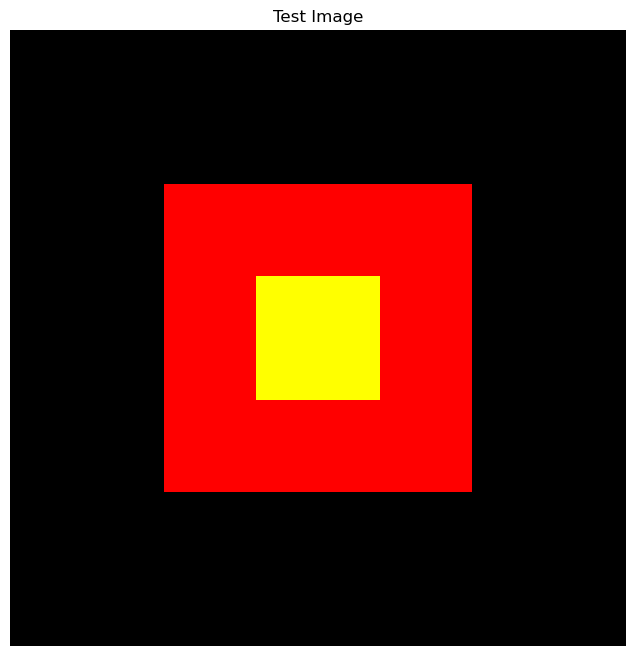

In [2]:
# Create a simple test image
test_image = np.zeros((100, 100, 3), dtype=np.uint8)
test_image[25:75, 25:75, 0] = 255  # Red square
test_image[40:60, 40:60, 1] = 255  # Green square inside

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(test_image)
plt.title("Test Image")
plt.axis('off')
plt.show()

## Loading the Image into PhenoScope

Now let's load this image into a PhenoScope `Image` object.

Image shape: (100, 100, 3)
Image schema: RGB


(<Figure size 900x1000 with 1 Axes>,
 <Axes: title={'center': 'a41a5392-ab01-468d-8c0f-730adf010f34'}>)

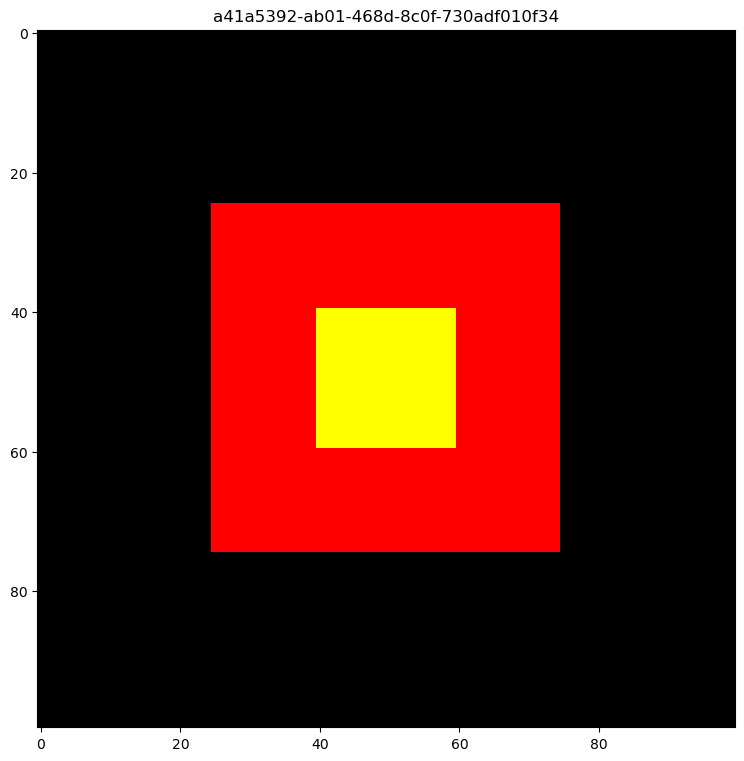

In [3]:
# Create an Image object from the numpy array
img = ps.Image(test_image, input_schema='RGB')
print(f"Image shape: {img.shape}")
print(f"Image schema: {img.schema}")
img.show()

# Accessing Componenent Elements
In order to access the components of each image as an array, the components must be sliced. However, many helper functions were addded to mimic normal numpy array behavior as well.

In [4]:

image_array = img.array # Without using a key to access elements the accessor object is returned
print(f"Image Array: Type={type(image_array)}, Shape={image_array.shape}")
image_array = img.array[:] # Instead of test_image.array
print(f"Image Array: Type={type(image_array)}, Shape={image_array.shape}")

image_array = img.matrix # Without using a key to access elements the accessor object is returned
print(f"Image Array: Type={type(image_array)}, Shape={image_array.shape}")
image_matrix = img.matrix[:] # Instead of test_image.matrix
print(f"Image Matrix: Type={type(image_matrix)}, Shape={image_matrix.shape}")

Image Array: Type=<class 'phenoscope.core.accessors._image_array_accessor.ImageArray'>, Shape=(100, 100, 3)
Image Array: Type=<class 'numpy.ndarray'>, Shape=(100, 100, 3)
Image Array: Type=<class 'phenoscope.core.accessors._image_matrix_accessor.ImageMatrix'>, Shape=(100, 100)
Image Matrix: Type=<class 'numpy.ndarray'>, Shape=(100, 100)


## Streamlined Prototyping
Display your work faster

Text(0.5, 1.0, 'Test')

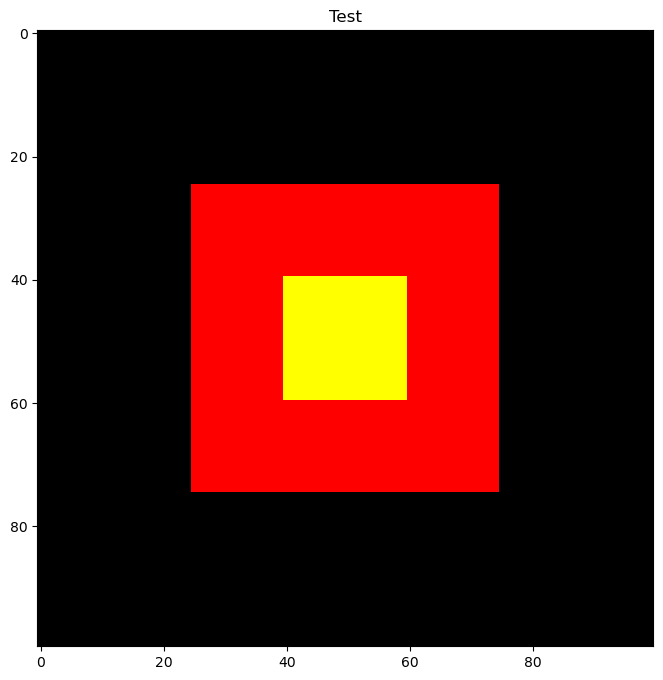

In [5]:
fig, ax = img.show(figsize=(8,8))
ax.set_title("Test")


## Basic Image Analysis

Let's perform some basic analysis on our image.

Mean RGB values: R=63.8, G=10.2, B=0.0


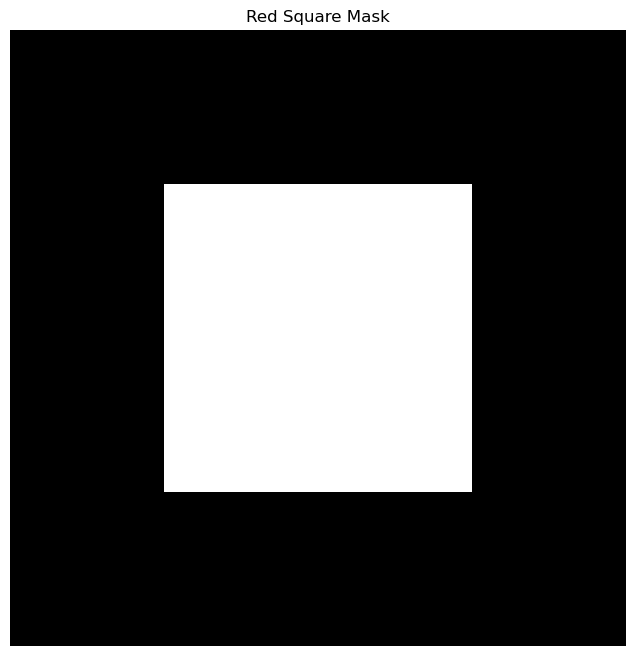

Number of red pixels: 2500
Expected number of pixels: 2500


In [6]:
# Extract features from the image
# For demonstration, we'll just get some basic statistics
mean_values = np.mean(img.array[:], axis=(0, 1))
print(f"Mean RGB values: R={mean_values[0]:.1f}, G={mean_values[1]:.1f}, B={mean_values[2]:.1f}")

# Create a mask for the red square
red_mask = img.array[:, :, 0] > 200
plt.figure(figsize=(8, 8))
plt.imshow(red_mask, cmap='gray')
plt.title("Red Square Mask")
plt.axis('off')
plt.show()

# Count the number of pixels in the red square
red_pixel_count = np.sum(red_mask)
print(f"Number of red pixels: {red_pixel_count}")
print(f"Expected number of pixels: {50 * 50}")

## Conclusion

This notebook demonstrated basic image loading and analysis with PhenoScope. For more advanced features, check out the other examples.